# Exercise 03 — Métricas e visualização

Neste exercício aplicamos métricas básicas previamente calculadas em visualizações simples, com o objetivo de aprender a traduzir tabelas numéricas em gráficos claros e interpretáveis.

O foco não está na criação de novas métricas, mas sim em:

- Escolher visualizações adequadas para cada tipo de métrica
- Ler gráficos de forma consciente
- Descrever visualmente padrões sem inferir causalidade

As visualizações utilizadas serão gráficos de barras e gráficos de linha simples, aplicados apenas quando fizer sentido.


## Preparação das métricas para visualização

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")

df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
media_total_por_dia = (
    df
    .groupby("day", observed=False)["total_bill"]
    .mean()
    .reset_index()
)

media_total_por_dia

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [3]:
media_gorjeta_por_periodo = (
    df
    .groupby("time", observed=False)["tip"]
    .mean()
    .reset_index()
)

media_gorjeta_por_periodo

,time,tip
0,Lunch,2.728088
1,Dinner,3.102670


In [4]:
contagem_por_dia = (
    df["day"]
    .value_counts()
    .reset_index()
)

contagem_por_dia.columns = ["day", "count"]
contagem_por_dia

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


## Gráficos de barras

In [5]:
import matplotlib.pyplot as plt

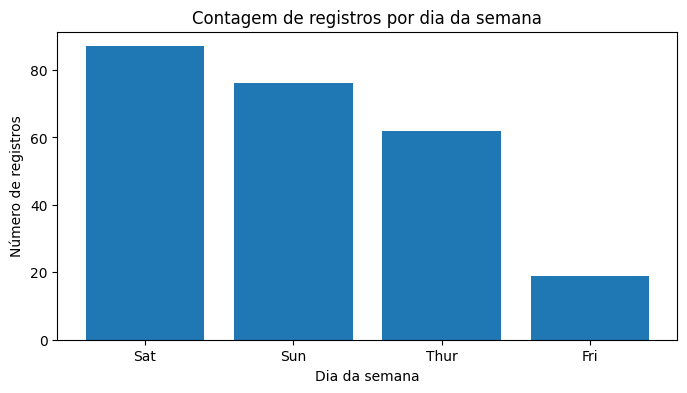

In [6]:
plt.figure(figsize=(8, 4))
plt.bar(contagem_por_dia["day"], contagem_por_dia["count"])
plt.xlabel("Dia da semana")
plt.ylabel("Número de registros")
plt.title("Contagem de registros por dia da semana")
plt.show()

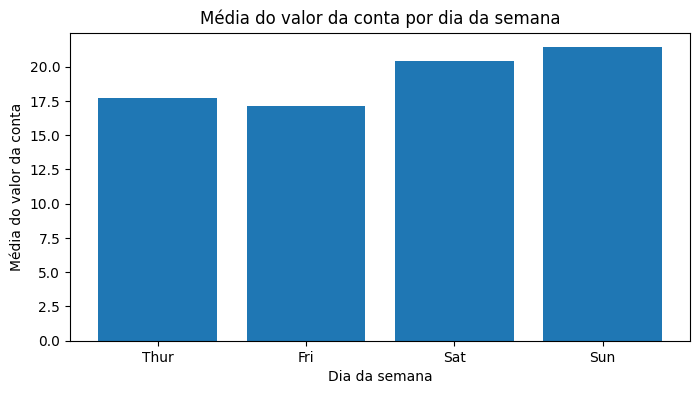

In [7]:
plt.figure(figsize=(8, 4))
plt.bar(media_total_por_dia["day"], media_total_por_dia["total_bill"])
plt.xlabel("Dia da semana")
plt.ylabel("Média do valor da conta")
plt.title("Média do valor da conta por dia da semana")
plt.show()

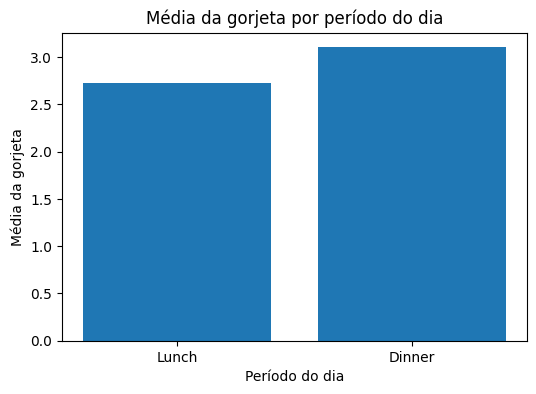

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(media_gorjeta_por_periodo["time"], media_gorjeta_por_periodo["tip"])
plt.xlabel("Período do dia")
plt.ylabel("Média da gorjeta")
plt.title("Média da gorjeta por período do dia")
plt.show()

## Gráficos de linha simples

In [9]:
ordem_dias = ["Thur", "Fri", "Sat", "Sun"]

media_total_bill_por_dia = (
    df
    .groupby("day", observed=False)["total_bill"]
    .mean()
    .reindex(ordem_dias)
)

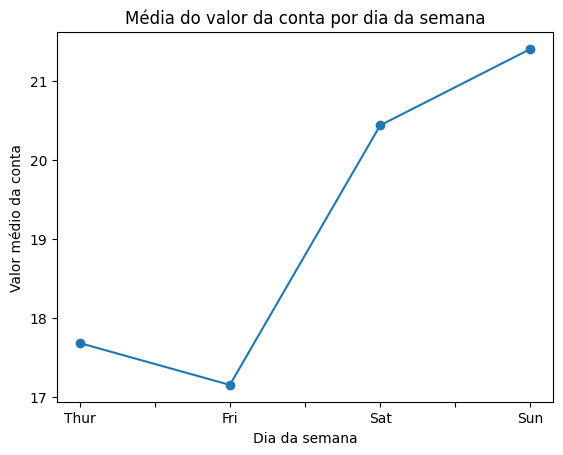

In [10]:
media_total_bill_por_dia.plot(marker="o")

plt.title("Média do valor da conta por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Valor médio da conta")

plt.show()

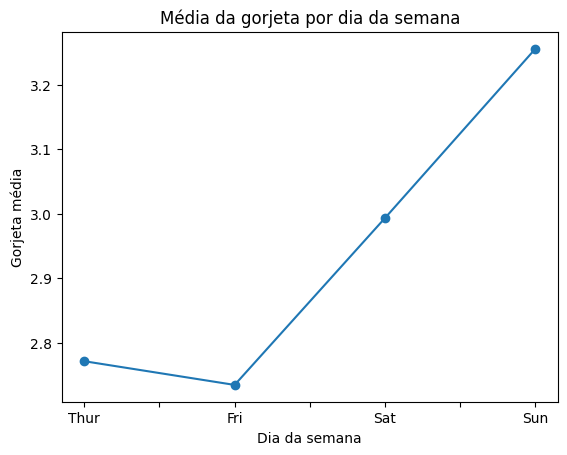

In [11]:
media_tip_por_dia = (
    df
    .groupby("day", observed=False)["tip"]
    .mean()
    .reindex(ordem_dias)
)

media_tip_por_dia.plot(marker="o")

plt.title("Média da gorjeta por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Gorjeta média")

plt.show()

## Leitura crítica das visualizações

Ao observar as visualizações, nota-se que os finais de semana concentram a maior parte dos registros do dataset. À primeira vista, essa informação isolada pode não indicar algo relevante, porém, ao relacioná-la com o gráfico da média do valor da conta por dia da semana, observa-se que os finais de semana também apresentam médias mais elevadas.

Esse comportamento sugere que a maior concentração de registros nos finais de semana pode estar associada a uma maior variabilidade dos valores observados, o que tende a elevar a média dessas categorias. Um padrão semelhante é observado na média da gorjeta por período do dia, onde o jantar apresenta uma média superior ao almoço, além de concentrar um volume significativamente maior de registros, conforme observado anteriormente no Exercise 02.

Nos gráficos de linha, tanto a média do valor da conta por dia da semana quanto a média da gorjeta por dia exibem uma tendência ascendente ao longo da ordenação das categorias. No entanto, essa visualização deve ser interpretada com cautela, uma vez que a ordenação dos dias não representa uma relação temporal contínua, e qualquer inferência causal a partir dessa tendência seria inadequada.

## Conclusões do exercício

A visualização dos dados permite observar com mais clareza a distribuição das variáveis e comparar como essa distribuição se comporta entre diferentes categorias. Tabelas oferecem uma comunicação organizada e precisa, facilitando a leitura de valores específicos, enquanto gráficos, quando bem construídos, proporcionam uma comunicação mais intuitiva, permitindo identificar padrões, diferenças e destaques visuais sem a necessidade de uma leitura detalhada de números.

Por meio das visualizações, torna-se mais fácil direcionar a análise para os pontos que se sobressaem, servindo como apoio para a formulação de hipóteses e investigações posteriores. Embora essas observações também possam ser realizadas por meio de tabelas, o processo tende a ser menos intuitivo e exigir mais etapas cognitivas.

Ainda assim, é fundamental reforçar que análises visuais não permitem inferências causais. As visualizações devem ser utilizadas como ferramentas exploratórias e descritivas, auxiliando na compreensão dos dados, mas não como evidência conclusiva de relações de causa e efeito.